# This notebook relies on the Coursera Course "Improving Deep Neural Networks: Hyperparameter tuning, Regularization and Optimization" from deeplearning.ai. Please enroll in this class, finish the programming exercises and download the "Tensorflow_Tutorial" and "tf_utils" files. Insert the correct code in the functions below.

### Import libraries

In [3]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

### 2.1 - Create placeholders

In [35]:
# GRADED FUNCTION: create_placeholders

def create_placeholders(n_x, n_y):
    
    # Insert code from create_placeholders function here
    
    return X, Y

In [44]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
        
    # Insert code from initialize_parameters function here.
    # MAKE SURE TO ADJUST THE INPUT WEIGHTS W1 AND OUTPUT WEIGHTS HERE TO FIT YOUR IMAGES!
    
    return parameters

### 2.3 - Forward propagation in tensorflow 

In [39]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
   
    # Insert code from forward_propagation function here.
    # IF YOU DECIDE TO TRAIN A DEEPER NETWORK, ALSO ADJUST THE CALCULATIONS HERE.
    
    return Z3

### 2.4 Compute cost

In [40]:
# GRADED FUNCTION: compute_cost 

def compute_cost(Z3, Y):
    
    # Insert code from compute_cost function here.
    
    return cost

### 2.5 - Building the model

In [41]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    
    # Insert code from model function here.
        
        return parameters

# Sneaker predictor

## Load dataset

In [25]:
# Read data here. Use only this line of code if you successfully saved the entire image_Rating_matrix
data = np.load('./imagerater/final_rated_images/imageAndRatingMatrix100.npy')

# Read and append iteratively data from multiple saved files
for i in range(2,15):
    data_new = np.load('./imagerater/final_rated_images/imageAndRatingMatrix{}00.npy'.format(i))
    data = np.append(data, data_new, axis=0)

### Transform data to match neural network architecture, split into X and Y

In [31]:
# Shuffle data to randomize the entries
np.random.shuffle(data)

# Get all data except the last row as the training data
X = data[:,:-1].T

# Make sure that Y dtype is int64 to not run into errors with one_hot_encoding
Y = np.array(data[:,-1].T.reshape(1,data.shape[0]), dtype=np.int64)
print(X.shape)
print(Y.shape)

(188928, 1369)
(1, 1369)


* Both X and Y now have the correct dimensions to be fed into the neural network. Make sure you adjust the placeholder parameters in the initialize_parameters function! 

### One hot encode sneaker rater

In [32]:
# Our rating scale ranges from 1-5, but apparently one zero rating crept into our training set.
# We will generate the one_hot_encoding with six classes and get rid of the row which contains only zeros. 
Y_OHE = convert_to_one_hot(Y, 6)
for i in range (6):
    if (np.sum(Y_OHE[0], axis=0) == 0):
        Y_OHE = np.delete(Y_OHE, (i), axis=0)
Y_OHE.shape

(5, 1369)

### Divide data in training and test splits

In [34]:
X_train = X[:,:1219]
X_test = X[:,1219:]
Y_train = Y_OHE[:,:1219]
Y_test = Y_OHE[:,1219:]

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1219
number of test examples = 150
X_train shape: (188928, 1219)
Y_train shape: (5, 1219)
X_test shape: (188928, 150)
Y_test shape: (5, 150)


# Train your neural network model

n_x: 188928
n_y: 5
Cost after epoch 0: 1.519138
Cost after epoch 100: 1.428907
Cost after epoch 200: 1.378570
Cost after epoch 300: 1.341133
Cost after epoch 400: 1.288298
Cost after epoch 500: 1.271644
Cost after epoch 600: 1.252591
Cost after epoch 700: 1.211348
Cost after epoch 800: 1.175020
Cost after epoch 900: 1.140434
Cost after epoch 1000: 1.139098
Cost after epoch 1100: 1.059108
Cost after epoch 1200: 1.061202
Cost after epoch 1300: 1.058313
Cost after epoch 1400: 1.027238


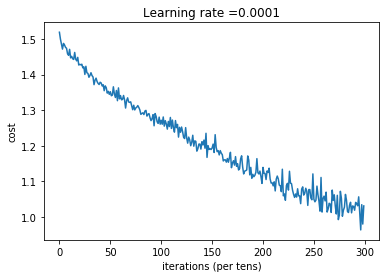

Parameters have been trained!
Train Accuracy: 0.246103
Test Accuracy: 0.2


In [45]:
parameters = model(X_train, Y_train, X_test, Y_test)

+ Congratulations, you've successfully trained your image classifier.
+ The performance is not what we expect from the model, so stay tuned for an update how to optimize and improve the performance.